# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [383]:
df = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [387]:
# Check for missing values
missing_data = df.isnull().sum()

# Drop all missing values
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Reading*

How many years of data are logged in our dataset? 

In [392]:
years_logged = df['YEAR'].nunique()
print(f"There are {years_logged} years of data logged in the dataset.")

There are 14 years of data logged in the dataset.


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [395]:
michigan_avg = df[df['STATE'] == 'MICHIGAN']['AVG_READING_4_SCORE'].mean()
ohio_avg = df[df['STATE'] == 'OHIO']['AVG_READING_4_SCORE'].mean()

if michigan_avg > ohio_avg:
    print("Michigan has a higher average score across all years.")
else:
    print("Ohio has a higher average score across all years.")

Ohio has a higher average score across all years.


Find the average for your chosen test across all states in 2019

In [398]:
average_2019 = df[df['YEAR'] == 2019]['AVG_READING_4_SCORE'].mean()
print(f"The average Grade 4 Reading score across all states in 2019 is {average_2019:.2f}.")

The average Grade 4 Reading score across all states in 2019 is 219.79.


For each state, find a maximum value for your chosen test score

In [401]:
max_scores_by_state = df.groupby('STATE')['AVG_READING_4_SCORE'].max()
print(max_scores_by_state)

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [405]:
df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']

Feature engineering justification: **I made this adjustment because I want to learn whether there is a relationship between students' reading grades between the amount of money spent per student. To explore, I could use a variable that calculates the expenditure per student.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

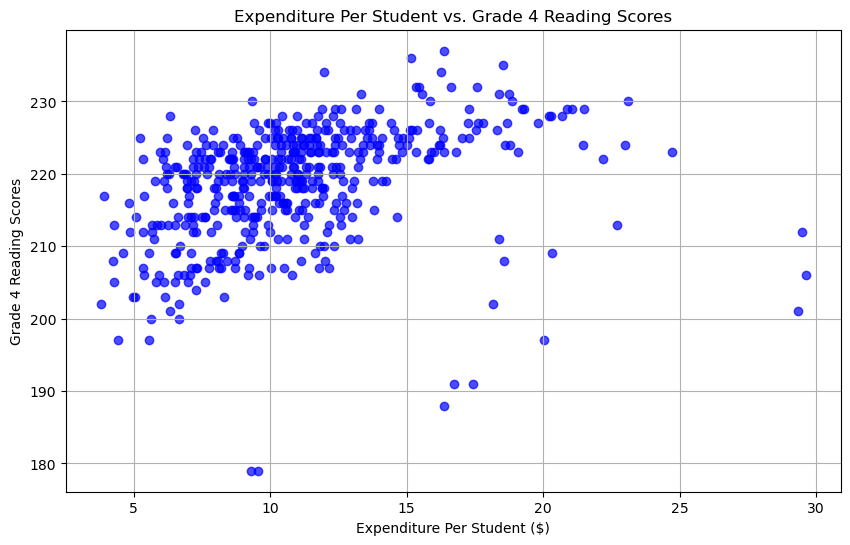

In [409]:
plt.figure(figsize=(10, 6))
plt.scatter(df['EXPENDITURE_PER_STUDENT'], df['AVG_READING_4_SCORE'], alpha=0.7, color='blue')
plt.title('Expenditure Per Student vs. Grade 4 Reading Scores')
plt.xlabel('Expenditure Per Student ($)')
plt.ylabel('Grade 4 Reading Scores')
plt.grid(True)
plt.show()

**<There appears to be a positive correlation between Expenditure Per Student and Grade 4 Reading Scores because as the expenditure per student increases, the reading scores also tend to be higher. Though the relationship is not perfectly linear, we can still say that it's roughly linear>**

**<Noticeably, a significant number of data points are clustered around an expenditure range of 5 to 15 dollars per student, with reading scores mostly falling between 200 and 230. This pattern suggests that most states have similar expenditure levels and achieve similar reading scores.>**

**<Also, for expenditures above $15 per student, the reading scores seem to plateau around 220-230, suggesting that beyond a certain level of spending, additional expenditure might not lead to significant improvements in reading scores.>**

**Visualization 2**

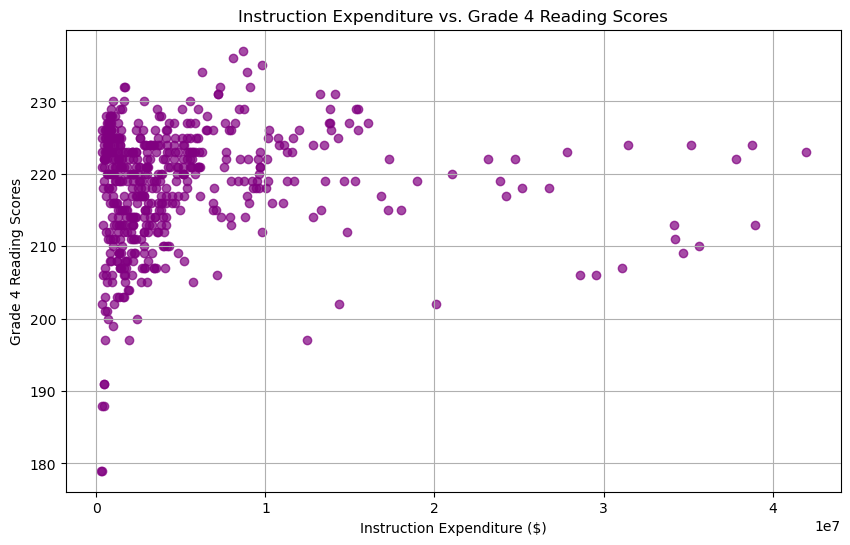

In [413]:
plt.figure(figsize=(10, 6))
plt.scatter(df['INSTRUCTION_EXPENDITURE'], df['AVG_READING_4_SCORE'], alpha=0.7, color='purple')
plt.title('Instruction Expenditure vs. Grade 4 Reading Scores')
plt.xlabel('Instruction Expenditure ($)')
plt.ylabel('Grade 4 Reading Scores')
plt.grid(True)
plt.show()

**<The scatter plot shows a general positive trend where states that spend more on instruction tend to have higher Grade 4 Reading scores. However, the relationship is not strictly linear, and there is significant variability in scores for similar levels of instructional expenditures as indicated by the wide spread of scores at different expenditure levels. Thus, further analysis, such as a polynomial regression, could help to better model the relationship.>**

**<A significant cluster of data points is visible at lower levels of instructional expenditure (below $1 million), where reading scores range mostly between 200 and 230. Such a cluster suggests that many states operate within a similar range of instructional spending, achieving a wide but still relatively high range of reading scores.>**

**<Additionally, there are some outliers with high instructional expenditures (above $2 million) where reading scores do not show a corresponding increase. These points indicate that simply spending more on instruction does not guarantee better reading outcomes, pointing to the possibility of inefficiencies or other influencing factors.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [417]:
from sklearn.model_selection import train_test_split

In [419]:
y = df.loc[X.index]['AVG_READING_4_SCORE']
X = df[['INSTRUCTION_EXPENDITURE', 'EXPENDITURE_PER_STUDENT']].dropna()

y.fillna(y.median(), inplace=True)

In [421]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [425]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [427]:
# create your model here
model = LinearRegression()

In [429]:
model.fit(X_train, y_train)

LinearRegression()

In [431]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [435]:
# Intercepts and coefficients
print(model.intercept_)
print(model.coef_)

# R^2 value that describes how well a linear model fits the data
model.score(X_test, y_test)

211.6918100879937
[4.80498744e-09 6.17850828e-01]


0.09962957504066905

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

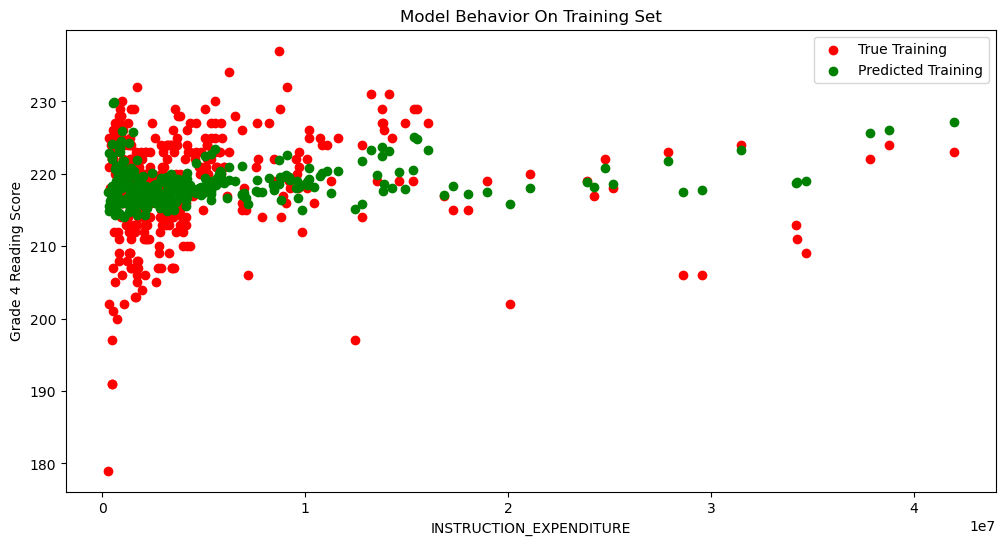

In [438]:
col_name = 'INSTRUCTION_EXPENDITURE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Reading Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

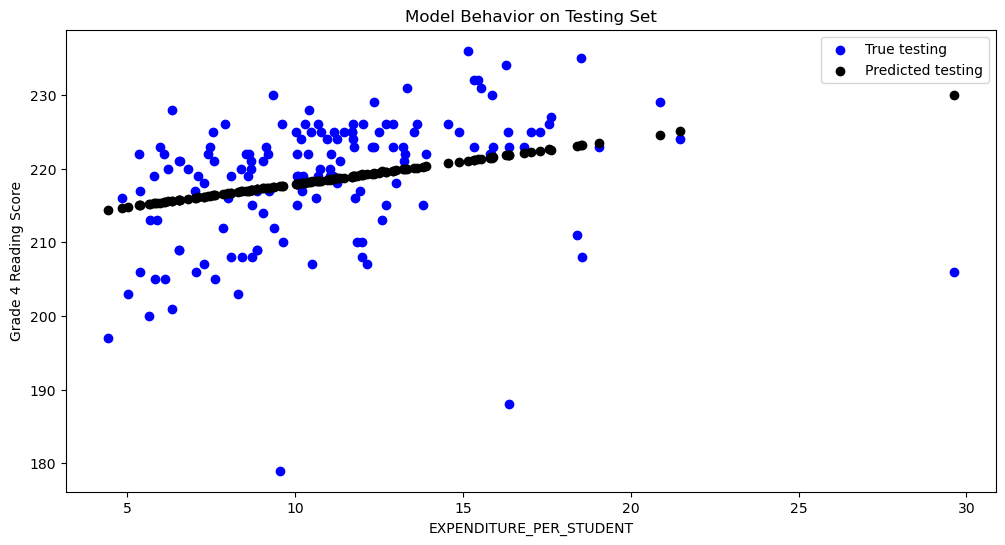

In [440]:
col_name = 'EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Reading Score')
plt.title("Model Behavior on Testing Set")